---

**Load essential libraries**

---

In [1]:
## Load modules

# Standard modules
import pandas as pd
import numpy as np
import sys
from scipy.stats import gaussian_kde
from scipy.stats import norm, t

# Plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')
%matplotlib inline
plt.rcParams['figure.figsize'] = (4.0, 4.0) # set default size of plots

pd.options.display.max_columns = None

---

Simulate and plot histograms of patient heart rates

---

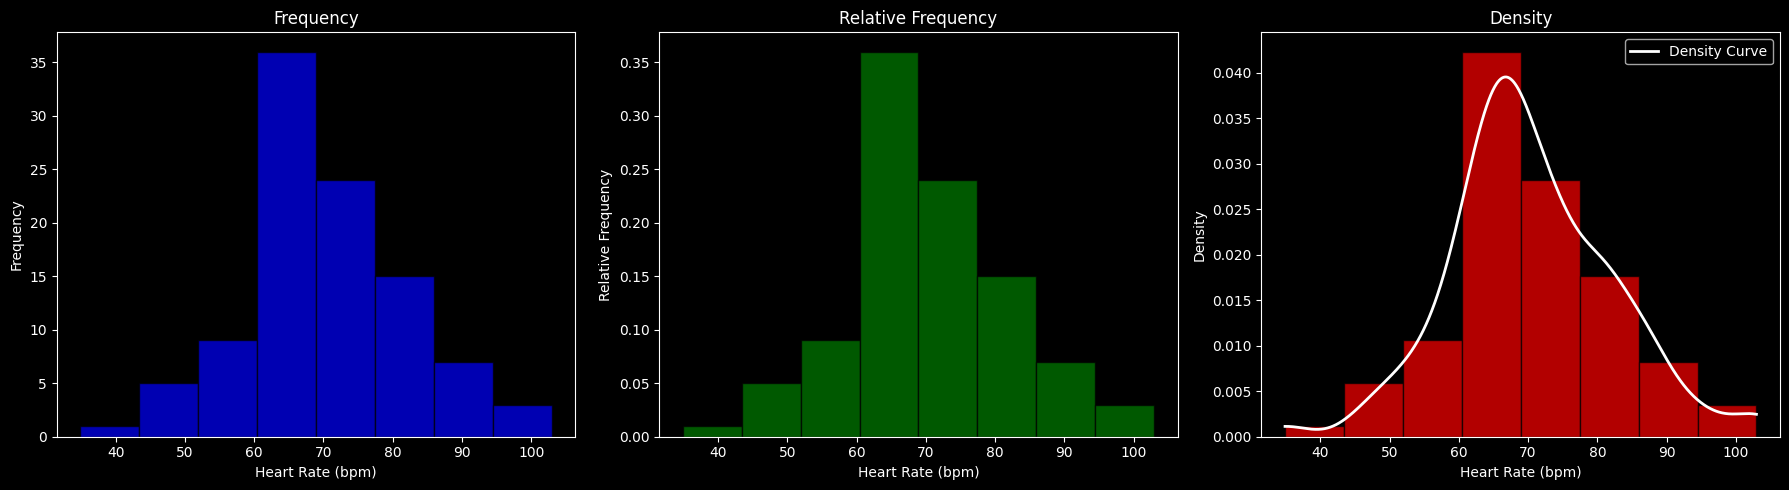

In [2]:
# Simulate heart rate data
nsamples = 100
heart_rate = np.random.normal(70, 10, nsamples)  # Mean = 70 bpm, std = 10

# Create histogram data for heart rate
hist, bin_edges = np.histogram(heart_rate, bins = 8)

# Bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = np.diff(bin_edges)

# Figure object for histograms
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Frequency histogram
axs[0].bar(bin_centers, hist, width=bin_width, color='blue', edgecolor = 'black', alpha=0.7)
axs[0].set_title('Frequency')
axs[0].set_xlabel('Heart Rate (bpm)')
axs[0].set_ylabel('Frequency')

# Relative frequency histogram
relative_freq = hist / hist.sum()  # Normalized for relative frequency
axs[1].bar(bin_centers, relative_freq, width=bin_width, color='green', edgecolor = 'black', alpha=0.7)
axs[1].set_title('Relative Frequency')
axs[1].set_xlabel('Heart Rate (bpm)')
axs[1].set_ylabel('Relative Frequency')

# Density histogram
density = hist / (np.sum(hist) * bin_width)  # Normalize for density
axs[2].bar(bin_centers, density, width=bin_width, color='red', edgecolor = 'black', alpha=0.7)
axs[2].set_title('Density')
axs[2].set_xlabel('Heart Rate (bpm)')
axs[2].set_ylabel('Density')

kde = gaussian_kde(heart_rate, bw_method=0.3)  # Kernel Density Estimate
x_range = np.linspace(min(heart_rate), max(heart_rate), 1000)
density_curve = kde(x_range)

axs[2].plot(x_range, density_curve, color='white', linewidth=2, label='Density Curve')  # Overlaying the curve
axs[2].legend()

plt.tight_layout()
plt.show()

---

Draw density curve over a randomly selected sample

---

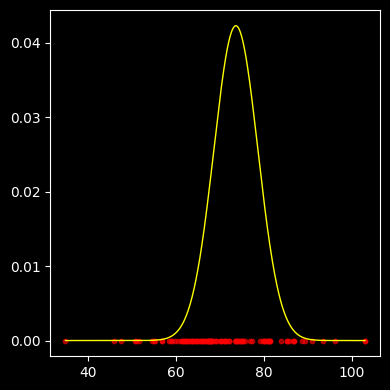

In [3]:
## Draw density curve over a randomly selected sample
centre_sample = np.random.choice(heart_rate)

# Neighborhood density (standard deviation)
sigma = 5

# Generate Gaussian curve (based on the selected center and neighborhood density)
x_range = np.linspace(min(heart_rate), max(heart_rate), 1000)
gaussian_curve = norm.pdf(x_range, centre_sample, sigma)  # Gaussian PDF centered at 'mu' with std 'sigma'

# Normalize the Gaussian curve to match the scale of the histogram and plot
gaussian_curve_normalized = gaussian_curve / np.max(gaussian_curve) * np.max(density)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(x_range, gaussian_curve_normalized, color='yellow', linewidth=1)
ax.scatter(heart_rate, np.zeros_like(heart_rate), color='red', marker='o', s=10, alpha=0.6)

plt.tight_layout()
plt.show()

---

Calculate similarity of selected centered sample with other samples

---

In [4]:
## Calculate similarity of selected centered sample with other samples
def gaussian_similarity(xi, xj, sigma):
    return np.exp(-((xi - xj) ** 2) / (2 * sigma ** 2))

similarities = np.array([gaussian_similarity(centre_sample, x, sigma) for x in heart_rate])

In [5]:
similarities

array([8.98482069e-02, 9.56290043e-01, 7.48738167e-02, 9.46796623e-01,
       4.13256583e-01, 3.17154089e-02, 1.54809733e-01, 4.34482269e-02,
       5.44988433e-01, 5.46866716e-02, 4.78161095e-01, 4.13110219e-01,
       4.69494078e-01, 9.60539192e-14, 1.32550610e-01, 4.75831550e-01,
       9.63306155e-01, 5.32312640e-01, 1.23706150e-02, 3.53691462e-03,
       3.15265528e-01, 2.25769767e-02, 6.39662665e-02, 9.79778543e-01,
       1.09266527e-02, 8.20072083e-02, 2.89859572e-01, 7.96120273e-01,
       7.77728736e-01, 1.27048649e-01, 3.62343184e-05, 8.14954096e-01,
       1.00000000e+00, 2.94152309e-01, 1.07669480e-03, 5.51409719e-02,
       5.64536281e-05, 9.23035862e-01, 3.58888476e-08, 3.08541723e-01,
       7.08217354e-02, 5.92258899e-02, 7.53783763e-01, 5.30560642e-01,
       3.31754871e-01, 1.21136242e-03, 3.05645046e-01, 5.56121163e-01,
       2.22270046e-07, 9.99182967e-01, 8.99369878e-01, 4.12921313e-01,
       2.13795379e-01, 5.31963215e-01, 1.51351309e-01, 6.52680668e-01,
      

---

Simulate and plot histograms of patient heart rates and blood pressures

---

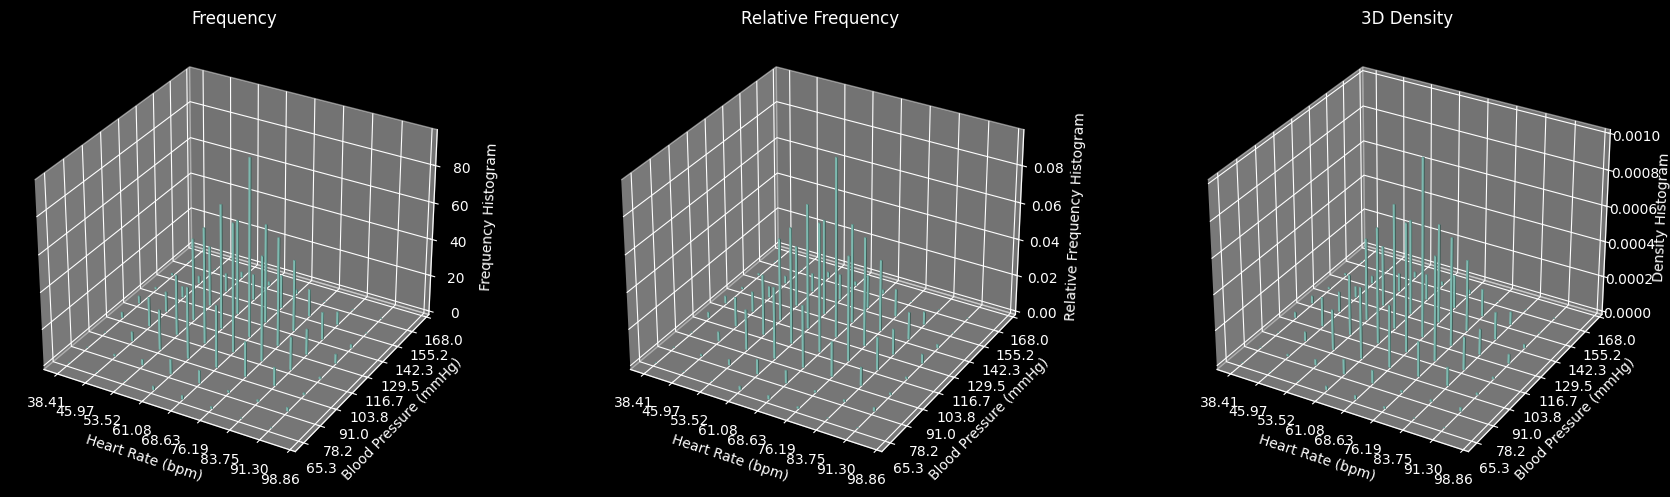

In [6]:
## Simulate and plot histograms of patient heart rates and blood pressures
nsamples = 1000
heart_rate = np.random.normal(70, 10, nsamples)  # Mean = 70 bpm, std = 10
blood_pressure = np.random.normal(120, 15, nsamples)  # Mean = 120 mmHg, std = 15

# Create 2D histogram data
hist, xedges, yedges = np.histogram2d(heart_rate, blood_pressure, bins = 8)

# Grid for plotting
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Width and depth of bars
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

# Figure object for histograms
fig = plt.figure(figsize=(18, 5))

# Frequency histogram
ax1 = fig.add_subplot(131, projection='3d')
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', cmap='Blues')
ax1.set_title('Frequency')
ax1.set_xlabel('Heart Rate (bpm)')
ax1.set_ylabel('Blood Pressure (mmHg)')
ax1.set_zlabel('Frequency Histogram')

# Adjust x and y ticks to match bin edges
ax1.set_xticks(xedges)
ax1.set_yticks(yedges)
ax1.grid(True)

# Relative frequency histogram
dz_rel = dz / dz.sum()  # Normalized for relative frequency
ax2 = fig.add_subplot(132, projection='3d')
ax2.bar3d(xpos, ypos, zpos, dx, dy, dz_rel, zsort='average', cmap='Greens')
ax2.set_title('Relative Frequency')
ax2.set_xlabel('Heart Rate (bpm)')
ax2.set_ylabel('Blood Pressure (mmHg)')
ax2.set_zlabel('Relative Frequency Histogram')

# Adjust x and y ticks to match bin edges
ax2.set_xticks(xedges)
ax2.set_yticks(yedges)
ax2.grid(True)

# Density histogram
dz_density = dz / (np.sum(dz) * (xedges[1] - xedges[0]) * (yedges[1] - yedges[0]))  # Normalize for density
ax3 = fig.add_subplot(133, projection='3d')
ax3.bar3d(xpos, ypos, zpos, dx, dy, dz_density, zsort='average', cmap='Reds')
ax3.set_title('3D Density')
ax3.set_xlabel('Heart Rate (bpm)')
ax3.set_ylabel('Blood Pressure (mmHg)')
ax3.set_zlabel('Density Histogram')

# Adjust x and y ticks to match bin edges
ax3.set_xticks(xedges)
ax3.set_yticks(yedges)
ax3.grid(True)

plt.tight_layout()
plt.show()